In [1]:
import matplotlib.pyplot as plt
import random as rnd
from scipy import stats
%matplotlib inline

import seaborn as sns
import sklearn 
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Convert CVSs to DataFrames

In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
combine = [train_data,test_data]

# Let's get a high level understanding of train_data and test_data

### First we'll look at rows & columns

In [3]:
train_data.shape

(8693, 14)

In [4]:
test_data.shape

(4277, 13)

### Let's take a deeper look

In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


**Categorical Data:**
Transported, PassengerId, CryoSleep, Cabin, HomePlanet, Destination, VIP

**Numerical Data**
Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

#### Cabin contains a mix of the two

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


train_data.head()

In [9]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Let's make lists of numeric vs categorical values


In [11]:
numeric = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
categorical = ['HomePlanet', 'CryoSleep','Cabin','Destination','VIP']

### Where are the null values?

In [12]:
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)

                0
PassengerId     0
HomePlanet    201
CryoSleep     217
Cabin         199
Destination   182
Age           179
VIP           203
RoomService   181
FoodCourt     183
ShoppingMall  208
Spa           183
VRDeck        188
Name          200
Transported     0


In [13]:
null_test_data_df = pd.DataFrame(test_data.isnull().sum())
print(null_test_data_df)

                0
PassengerId     0
HomePlanet     87
CryoSleep      93
Cabin         100
Destination    92
Age            91
VIP            93
RoomService    82
FoodCourt     106
ShoppingMall   98
Spa           101
VRDeck         80
Name           94


#### They are in every column except for PassengerID and Transported

# Investigate and clean the data

# Let's look at immediate correlations on numeric columns

In [14]:
numeric_data = train_data[numeric]
correlation_matrix_numeric = numeric_data.corr()

print("Numeric Correlations:")
print(correlation_matrix_numeric)

Numeric Correlations:
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


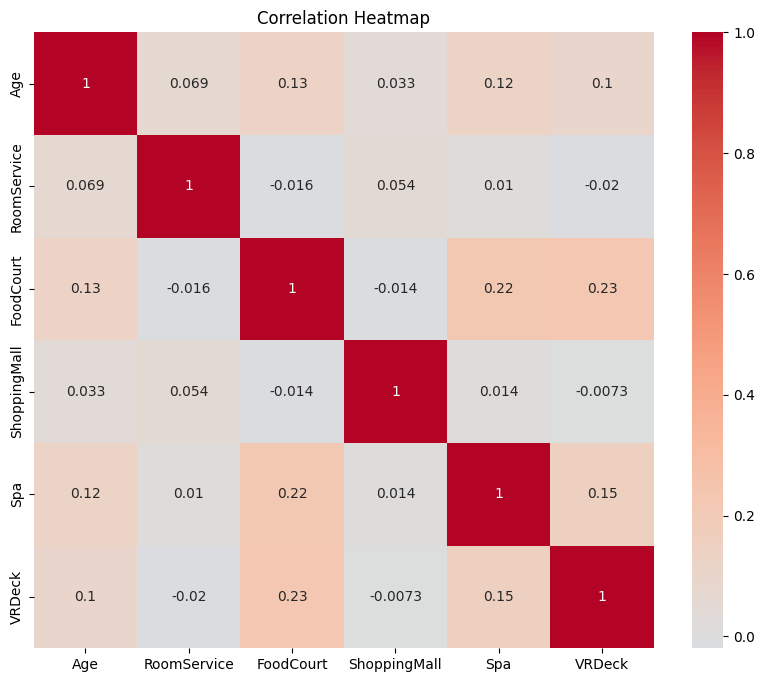

In [15]:
# Create a new DataFrame with the binary encoded CryoSleep column
train_data['CryoSleepBinary'] = train_data['CryoSleep'].apply(lambda x: 1 if x == 'Yes' else 0)
data_for_heatmap = train_data[numeric]

# Calculate the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## We'll start on attributes by investigating HomePlanet and Destination

In [16]:
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [17]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

## replace nan with the mode

In [18]:
for dataset in combine:
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0],inplace=True)
    dataset['Destination'].fillna(dataset['Destination'].mode()[0],inplace=True)

#### Let's verify

In [19]:
train_data['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [20]:
train_data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [21]:
test_data['HomePlanet'].isnull().sum()

0

## Let's see the breakdown

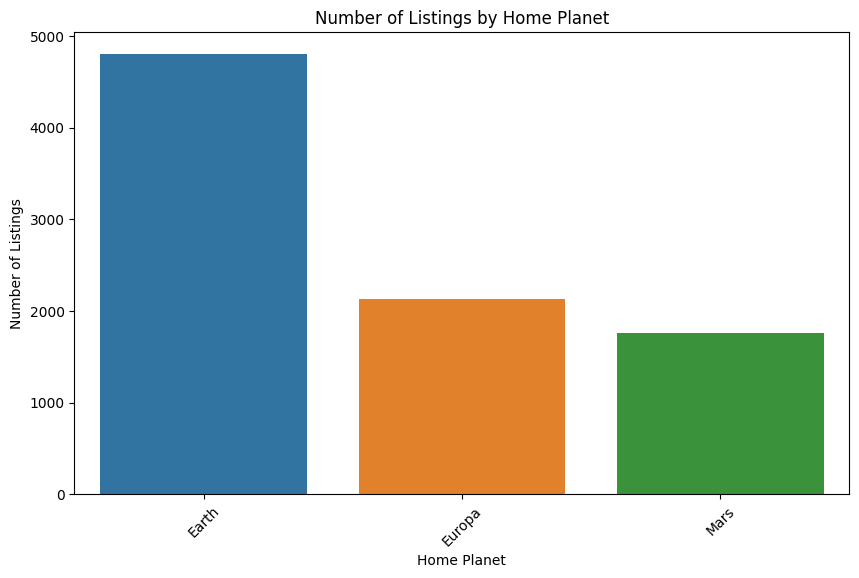

In [22]:
planet_counts = train_data.groupby('HomePlanet')['HomePlanet'].count()

planet_counts = planet_counts.reset_index(name='Counts')

planet_counts = planet_counts.sort_values(by='Counts', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=planet_counts, x='HomePlanet', y='Counts', order=planet_counts['HomePlanet'])
plt.xlabel('Home Planet')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Home Planet')
plt.xticks(rotation=45)
plt.show()

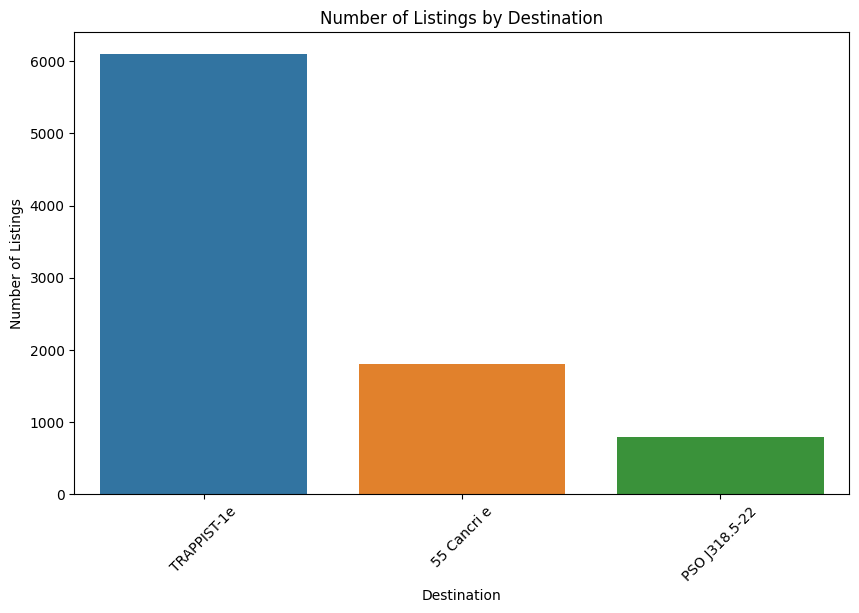

In [23]:
planet_counts = train_data.groupby('Destination')['Destination'].count()

planet_counts = planet_counts.reset_index(name='Counts')

planet_counts = planet_counts.sort_values(by='Counts', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=planet_counts, x='Destination', y='Counts', order=planet_counts['Destination'])
plt.xlabel('Destination')
plt.ylabel('Number of Listings')
plt.title('Number of Listings by Destination')
plt.xticks(rotation=45)
plt.show()

## One-hot encode Home Planet

In [24]:
train_data = pd.get_dummies(train_data, columns = ['HomePlanet'])
test_data = pd.get_dummies(test_data, columns = ['HomePlanet'])

## One-hot encode Destination

In [25]:
train_data = pd.get_dummies(train_data, columns = ['Destination'])
test_data = pd.get_dummies(test_data, columns = ['Destination'])
combine = [train_data, test_data]

## One-hot encode VIP

In [26]:
train_data = pd.get_dummies(train_data, columns = ['VIP'])
test_data = pd.get_dummies(test_data, columns = ['VIP'])
for dataset in combine:
    le = LabelEncoder()
    dataset['VIP'] = le.fit_transform(dataset['VIP'])

# Let's Investigate CryoSleep

In [27]:
train_data['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [28]:
train_data[['CryoSleep','Transported']].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported',ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


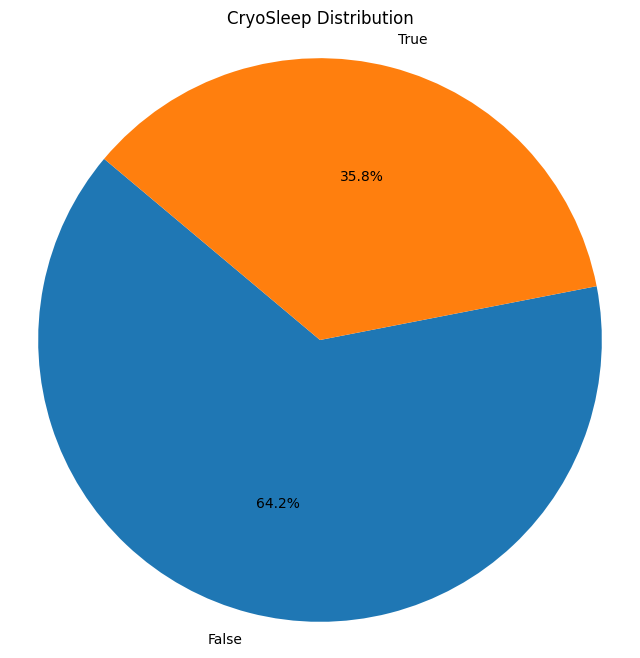

In [29]:
cryo_sleep_counts = train_data['CryoSleep'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cryo_sleep_counts, labels=cryo_sleep_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('CryoSleep Distribution')
plt.axis('equal') 
plt.show()

## People in cryosleep should not be spending money anywhere else on the ship. Let's verify.

In [30]:


#Drop CryoSleepBinary
train_data.drop('CryoSleepBinary', axis=1, inplace=True)

# Filter the DataFrame where CryoSleepBinary is 1
filtered_data = train_data[train_data['CryoSleep'] == True]

filtered_data.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


### Excellent

## Now lets deal with these nulls. 
### Let's start by looking at what percentage of people NOT in Cryosleep spent no money at all to see if we can safely use this as a metric to fill in these nulls

In [31]:
# Filter the DataFrame based on multiple conditions
filtered_data_2 = train_data[
    (train_data['CryoSleep'] == False) &
    (train_data['RoomService'] == 0) &
    (train_data['FoodCourt'] == 0) &
    (train_data['ShoppingMall'] == 0) &
    (train_data['Spa'] == 0) &
    (train_data['VRDeck'] == 0)
]

# Describe the filtered DataFrame
filtered_data_2.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,463.000000,470.0,470.0,470.0,470.0,470.0
mean,10.336933,0.0,0.0,0.0,0.0,0.0
std,12.741302,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,1.500000,0.0,0.0,0.0,0.0,0.0
50%,7.000000,0.0,0.0,0.0,0.0,0.0
75%,11.500000,0.0,0.0,0.0,0.0,0.0
max,71.000000,0.0,0.0,0.0,0.0,0.0


## Good thing we did that. Looking at the above dataframe, we can see that the ONLY way someone would not be spending money is if they are a juvenile. 

In [32]:
# Replace NaN values in the 'CryoSleep' column of train_data
train_data['CryoSleep'].fillna(
    value=train_data.apply(lambda row: 0 if (
        (row['CryoSleep'] == False) and
        (row['RoomService'] == 0) and
        (row['FoodCourt'] == 0) and
        (row['ShoppingMall'] == 0) and
        (row['Spa'] == 0) and
        (row['VRDeck'] == 0) and
        (row['Age'] > 16)
    ) else 1, axis=1),
    inplace=True
)

# Replace NaN values in the 'CryoSleep' column of test_data
test_data['CryoSleep'].fillna(
    value=test_data.apply(lambda row: 0 if (
        (row['CryoSleep'] == False) and
        (row['RoomService'] == 0) and
        (row['FoodCourt'] == 0) and
        (row['ShoppingMall'] == 0) and
        (row['Spa'] == 0) and
        (row['VRDeck'] == 0) and
        (row['Age'] > 16)
    ) else 1, axis=1),
    inplace=True
)

## One hot encode CryoSleep

In [33]:
train_data = pd.get_dummies(train_data, columns=['CryoSleep'])
test_data = pd.get_dummies(test_data, columns=['CryoSleep'])
combine = [train_data,test_data]

In [34]:
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)

                             0
PassengerId                  0
Cabin                      199
Age                        179
RoomService                181
FoodCourt                  183
ShoppingMall               208
Spa                        183
VRDeck                     188
Name                       200
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
CryoSleep_False              0
CryoSleep_True               0


## Lets replace costs with the medians

### Room Service

In [35]:
# Calculate the median of the 'RoomService' column in train_data
median_room_service_train = train_data['RoomService'].median()

# Replace null values in the 'RoomService' column of train_data with the median
train_data['RoomService'].fillna(median_room_service_train, inplace=True)

# Calculate the median of the 'RoomService' column in test_data
median_room_service_test = test_data['RoomService'].median()

# Replace null values in the 'RoomService' column of test_data with the median
test_data['RoomService'].fillna(median_room_service_test, inplace=True)

### Food Court

In [36]:
# Calculate the median of the 'RoomService' column in train_data
median_room_service_train = train_data['FoodCourt'].median()

# Replace null values in the 'RoomService' column of train_data with the median
train_data['FoodCourt'].fillna(median_room_service_train, inplace=True)

# Calculate the median of the 'RoomService' column in test_data
median_room_service_test = test_data['FoodCourt'].median()

# Replace null values in the 'RoomService' column of test_data with the median
test_data['FoodCourt'].fillna(median_room_service_test, inplace=True)

### Shopping Mall

In [37]:
# Calculate the median of the 'RoomService' column in train_data
median_room_service_train = train_data['ShoppingMall'].median()

# Replace null values in the 'RoomService' column of train_data with the median
train_data['ShoppingMall'].fillna(median_room_service_train, inplace=True)

# Calculate the median of the 'RoomService' column in test_data
median_room_service_test = test_data['ShoppingMall'].median()

# Replace null values in the 'RoomService' column of test_data with the median
test_data['ShoppingMall'].fillna(median_room_service_test, inplace=True)

### Spa

In [38]:
# Calculate the median of the 'RoomService' column in train_data
median_room_service_train = train_data['Spa'].median()

# Replace null values in the 'RoomService' column of train_data with the median
train_data['Spa'].fillna(median_room_service_train, inplace=True)

# Calculate the median of the 'RoomService' column in test_data
median_room_service_test = test_data['Spa'].median()

# Replace null values in the 'RoomService' column of test_data with the median
test_data['Spa'].fillna(median_room_service_test, inplace=True)

### VR Deck

In [39]:

# Calculate the median of the 'RoomService' column in train_data
median_room_service_train = train_data['VRDeck'].median()

# Replace null values in the 'RoomService' column of train_data with the median
train_data['VRDeck'].fillna(median_room_service_train, inplace=True)

# Calculate the median of the 'RoomService' column in test_data
median_room_service_test = test_data['VRDeck'].median()

# Replace null values in the 'RoomService' column of test_data with the median
test_data['VRDeck'].fillna(median_room_service_test, inplace=True)

In [40]:
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)

                             0
PassengerId                  0
Cabin                      199
Age                        179
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
CryoSleep_False              0
CryoSleep_True               0


## If someone is in CryoSleep but did NOT spend money, then we can safely assume that they are likely a child. If not, they are an adult. Let's add the median age for adults, and the 50th percintile of juvile ages, 11.5.

In [41]:
median_age = train_data['Age'].median()

# Replace NaN values in the 'Age' column of test_data
train_data['Age'].fillna(
    value=train_data.apply(lambda row: 11.5 if (
        (row['CryoSleep_True'] == 0) and
        (row['RoomService'] == 0) and
        (row['FoodCourt'] == 0) and
        (row['ShoppingMall'] == 0) and
        (row['Spa'] == 0) and
        (row['VRDeck'] == 0)
    ) else median_age, axis=1),
    inplace=True
)

median_age_test = test_data['Age'].median()

# Replace NaN values in the 'Age' column of test_data
test_data['Age'].fillna(
    value=test_data.apply(lambda row: 11.5 if (
        (row['CryoSleep_True'] == 0) and
        (row['RoomService'] == 0) and
        (row['FoodCourt'] == 0) and
        (row['ShoppingMall'] == 0) and
        (row['Spa'] == 0) and
        (row['VRDeck'] == 0)
    ) else median_age_test, axis=1),
    inplace=True
)

### and to verify

In [42]:
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)

                             0
PassengerId                  0
Cabin                      199
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
Name                       200
Transported                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
VIP_False                    0
VIP_True                     0
CryoSleep_False              0
CryoSleep_True               0


## Cabin Time! Let's see how cabins look

In [43]:
cabin=pd.DataFrame(train_data['Cabin'].unique())

In [44]:
cabin.head(5)

,0
0,B/0/P
1,F/0/S
2,A/0/S
3,F/1/S
4,F/0/P


## Cabin is broken down into Deck / Number / Side. Deck is A-E, side is P for "Port" or S for "Starboard"

## Deck and Side are categorical while Number is numeric. We'll replace these with non-existant letters & numbers

In [45]:
train_data['Cabin'].fillna('Z/9999/Z', inplace=True)
test_data['Cabin'].fillna('Z/9999/Z', inplace=True)

## Use feature engineering to break down the cabin by Deck, Number, and Side

In [46]:
# Function to split the 'Cabin' column into 'Deck', 'Number', and 'Side' columns
def split_cabin_column(data):
    split_data = data['Cabin'].str.split('/', expand=True)
    data['Deck'] = split_data[0]
    data['Number'] = split_data[1]
    data['Side'] = split_data[2]

# Apply the function to both train_data and test_data
split_cabin_column(train_data)
split_cabin_column(test_data)

# Print the updated DataFrames
print("Train Data:")
print(train_data)

print("\nTest Data:")
print(test_data)

# Print the updated DataFrames
print("Train Data:")
print(train_data)

print("\nTest Data:")
print(test_data)


# Now check for null values in the DataFrames
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)


Train Data:
     PassengerId     Cabin   Age  RoomService  FoodCourt  ShoppingMall  \
0        0001_01     B/0/P  39.0          0.0        0.0           0.0   
1        0002_01     F/0/S  24.0        109.0        9.0          25.0   
2        0003_01     A/0/S  58.0         43.0     3576.0           0.0   
3        0003_02     A/0/S  33.0          0.0     1283.0         371.0   
4        0004_01     F/1/S  16.0        303.0       70.0         151.0   
...          ...       ...   ...          ...        ...           ...   
8688     9276_01    A/98/P  41.0          0.0     6819.0           0.0   
8689     9278_01  G/1499/S  18.0          0.0        0.0           0.0   
8690     9279_01  G/1500/S  26.0          0.0        0.0        1872.0   
8691     9280_01   E/608/S  32.0          0.0     1049.0           0.0   
8692     9280_02   E/608/S  44.0        126.0     4688.0           0.0   

         Spa  VRDeck               Name  Transported  ...  \
0        0.0     0.0    Maham Ofraccul

## One-Hot Encode Deck and Side

In [47]:
train_data = pd.get_dummies(train_data,columns=['Deck'])
test_data = pd.get_dummies(test_data,columns=['Deck'])
train_data = pd.get_dummies(train_data,columns=['Side'])
test_data = pd.get_dummies(test_data,columns=['Side'])
combine = [train_data,test_data]

In [48]:
# Remove 'Name'

train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)


## Check for nulls once again to ensure they're all gone

In [49]:
null_train_data_df = pd.DataFrame(train_data.isnull().sum())
print(null_train_data_df)

                           0
PassengerId                0
Cabin                      0
Age                        0
RoomService                0
FoodCourt                  0
ShoppingMall               0
Spa                        0
VRDeck                     0
Transported                0
HomePlanet_Earth           0
HomePlanet_Europa          0
HomePlanet_Mars            0
Destination_55 Cancri e    0
Destination_PSO J318.5-22  0
Destination_TRAPPIST-1e    0
VIP_False                  0
VIP_True                   0
CryoSleep_False            0
CryoSleep_True             0
Number                     0
Deck_A                     0
Deck_B                     0
Deck_C                     0
Deck_D                     0
Deck_E                     0
Deck_F                     0
Deck_G                     0
Deck_T                     0
Deck_Z                     0
Side_P                     0
Side_S                     0
Side_Z                     0


## Excellent! No more null values

In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Cabin                      8693 non-null   object 
 2   Age                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

# Feature Engineering
## Add all services in a new column titled "TotExpenses"

In [51]:
expendature = ['RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck', 'Spa']

for dataset in [train_data, test_data]:
    dataset['TotExpenses'] = dataset[expendature].sum(axis=1)

## If the person is over 16, they're not in CryoSleep, and they spent no money then add them to 'NoMoneySpent' column


In [52]:
for dataset in [train_data, test_data]:
    dataset['NoDoughSpent'] = (dataset['CryoSleep_False'] == 1) & (dataset['Age'] >= 16) & (dataset['TotExpenses'] == 0)
    dataset['NoDoughSpent'] = dataset['NoDoughSpent'].astype(int)

## The PassengerID shows if people are together. I want two columns: 'Solo' and 'GroupSize'


In [53]:
# Extract the room number from PassengerID
train_data['Room'] = train_data['PassengerId'].str.extract(r'(\d{4})')[0]
test_data['Room'] = test_data['PassengerId'].str.extract(r'(\d{4})')[0]

# Extract the passenger number from PassengerID
train_data['PassengerNum'] = train_data['PassengerId'].str.extract(r'_(\d{2})')[0]
test_data['PassengerNum'] = test_data['PassengerId'].str.extract(r'_(\d{2})')[0]

# Convert 'PassengerNum' to numeric
train_data['PassengerNum'] = pd.to_numeric(train_data['PassengerNum'])
test_data['PassengerNum'] = pd.to_numeric(test_data['PassengerNum'])

# Create the 'GroupNum' column by counting the number of passengers in each room
train_data['GroupNum'] = train_data.groupby('Room')['PassengerNum'].transform('max')
test_data['GroupNum'] = test_data.groupby('Room')['PassengerNum'].transform('max')

# Create the 'Solo' column
train_data['Solo'] = (train_data['GroupNum'] == 1).astype(int)
test_data['Solo'] = (test_data['GroupNum'] == 1).astype(int)

# Drop temporary columns used for calculations
train_data.drop(['Room', 'PassengerNum'], axis=1, inplace=True)
test_data.drop(['Room', 'PassengerNum'], axis=1, inplace=True)

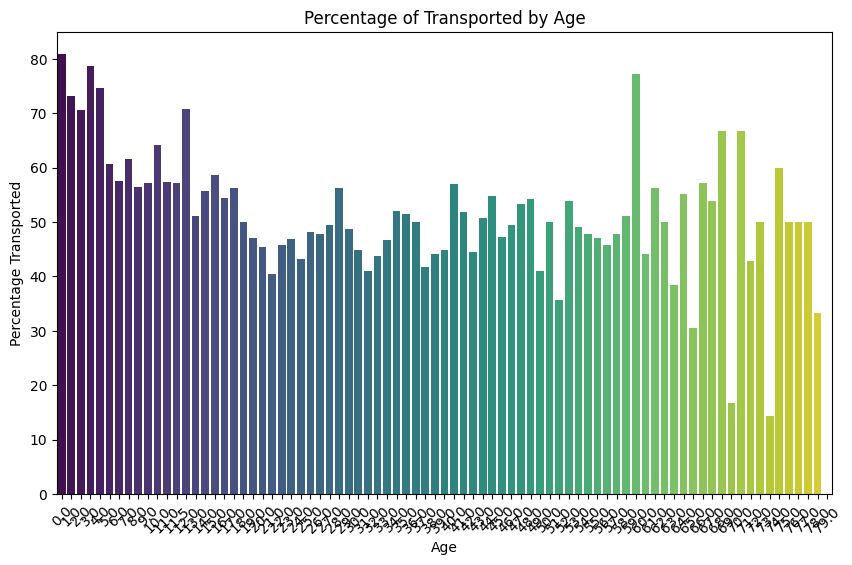

In [54]:
# Calculate the percentage of 'Transported' for each age group
age_transported_percentage = train_data.groupby('Age')['Transported'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_transported_percentage.index, y=age_transported_percentage.values, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Percentage Transported')
plt.title('Percentage of Transported by Age')
plt.xticks(rotation=45)
plt.show()

## This is some pretty tight clustering. Let's bin it by 4s

In [55]:
# Defbin edges and labels
bin_edges = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80]
bin_labels = ['0-3', '4-7', '8-11', '12-15', '16-19', '20-23', '24-27', '28-31', '32-35', '36-39',
              '40-43', '44-47', '48-51', '52-55', '56-59', '60-63', '64-67', '68-71', '72-75', '76-79']

# Bin the 'Age' column in train_data and test_data
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bin_edges, labels=bin_labels, right=False)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=bin_edges, labels=bin_labels, right=False)

Text(0.5, 0, 'Age (years)')

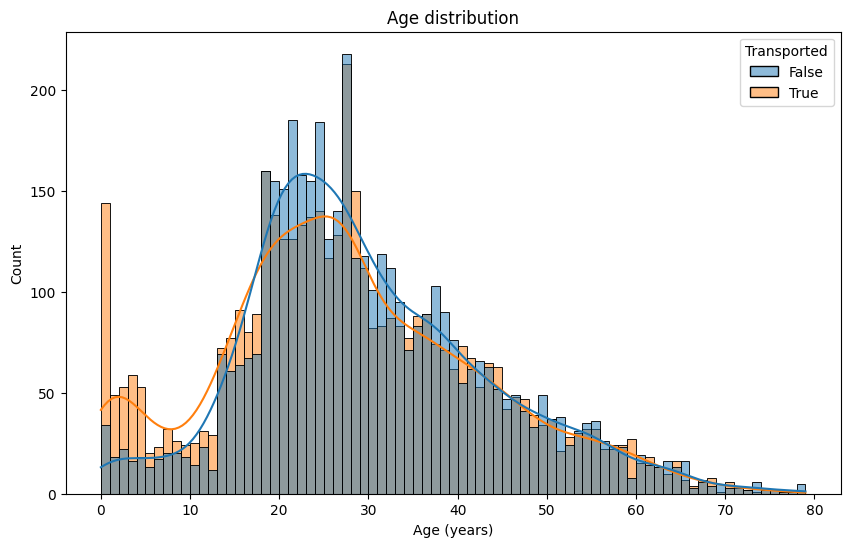

In [56]:
plt.figure(figsize=(10,6))
sns.histplot(data=train_data, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')

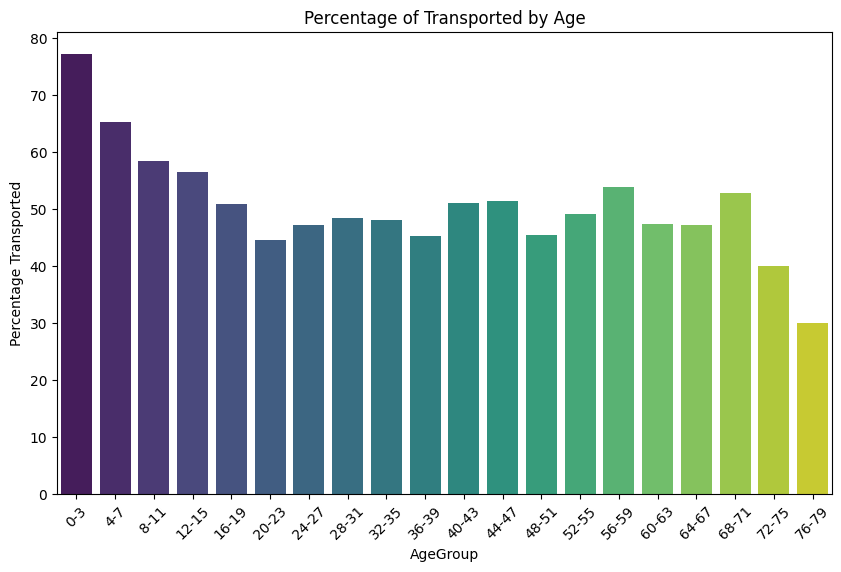

In [57]:
# Calculate the percentage of 'Transported' for each age group
age_transported_percentage = train_data.groupby('AgeGroup')['Transported'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_transported_percentage.index, y=age_transported_percentage.values, palette='viridis')
plt.xlabel('AgeGroup')
plt.ylabel('Percentage Transported')
plt.title('Percentage of Transported by Age')
plt.xticks(rotation=45)
plt.show()

## One-hot encode AgeGroup

In [58]:
train_data = pd.get_dummies(train_data, columns = ['AgeGroup'])
test_data = pd.get_dummies(test_data, columns = ['AgeGroup'])
combine = [train_data, test_data]

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Cabin                      8693 non-null   object 
 2   Age                        8693 non-null   float64
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   bool   
 10  HomePlanet_Europa          8693 non-null   bool   
 11  HomePlanet_Mars            8693 non-null   bool   
 12  Destination_55 Cancri e    8693 non-null   bool   
 13  Destination_PSO J318.5-22  8693 non-null   bool 

## Kids under 15 are more likely to be transported

### Credit for this next part goes to [Samuel Cortinhas](https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide)

## We find the numbers and bin them by 300s

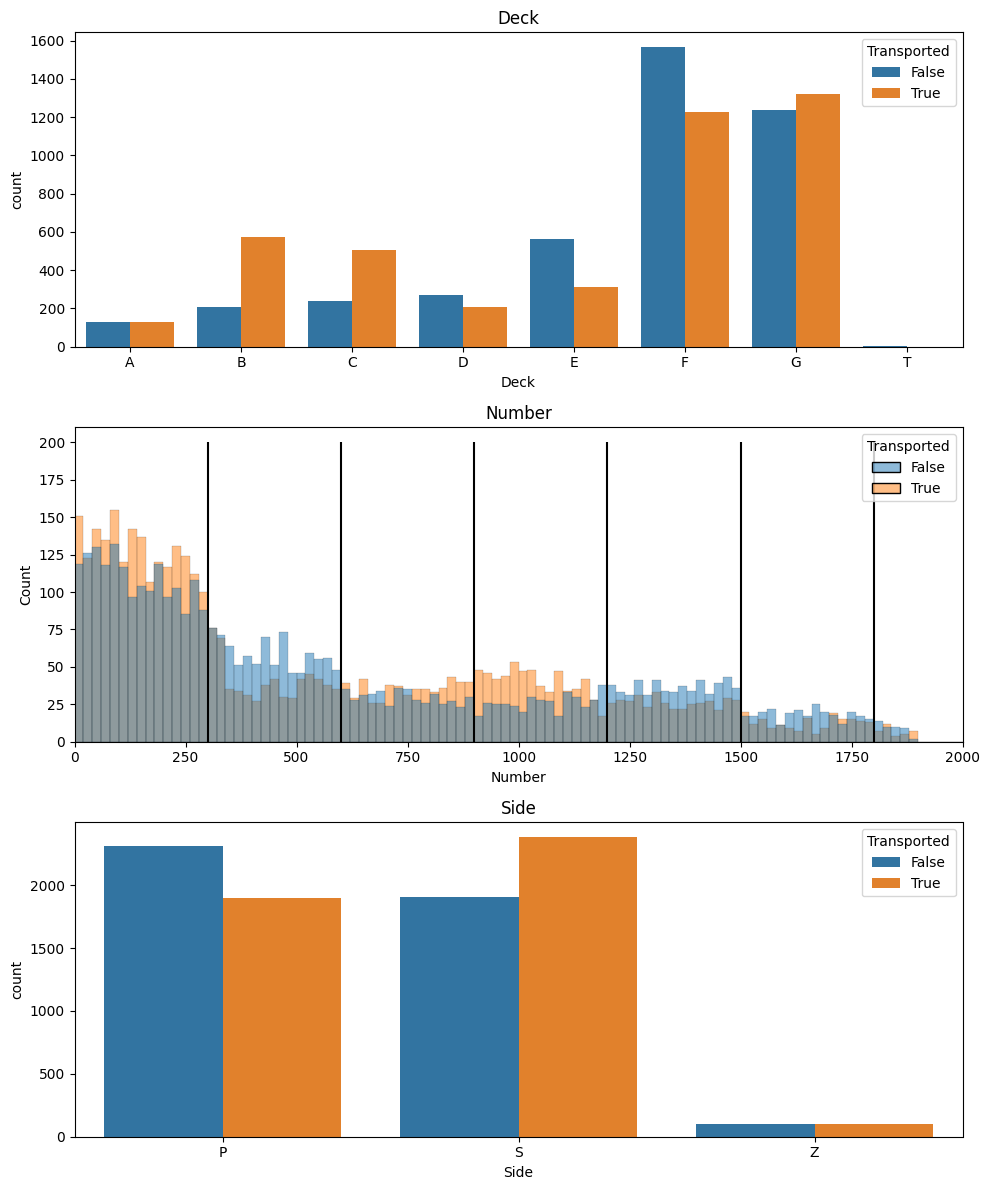

In [60]:
# Replace NaN's and 'Unknown' values with outliers for now (so we can split feature)
train_data['Cabin'].fillna('Z/9999/Z', inplace=True)
test_data['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
train_data['Deck'] = train_data['Cabin'].apply(lambda x: x.split('/')[0])
train_data['Number'] = train_data['Cabin'].apply(lambda x: x.split('/')[1])
train_data['Side'] = train_data['Cabin'].apply(lambda x: x.split('/')[2])

# Replace 'Unknown' values with a placeholder (e.g., -1) for 'Number' column
train_data['Number'].replace('Unknown', -1, inplace=True)

# Convert 'Number' column to integers, treating the placeholder as NaN
train_data['Number'] = pd.to_numeric(train_data['Number'], errors='coerce').astype(int)

# New features - test set
test_data['Deck'] = test_data['Cabin'].apply(lambda x: x.split('/')[0])
test_data['Number'] = test_data['Cabin'].apply(lambda x: x.split('/')[1])
test_data['Side'] = test_data['Cabin'].apply(lambda x: x.split('/')[2])

# Replace 'Unknown' values with a placeholder (e.g., -1) for 'Number' column
test_data['Number'].replace('Unknown', -1, inplace=True)

# Convert 'Number' column to integers, treating the placeholder as NaN
test_data['Number'] = pd.to_numeric(test_data['Number'], errors='coerce').astype(int)

# Plot distribution of new features
fig = plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
sns.countplot(data=train_data, x='Deck', hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.title('Deck')

plt.subplot(3, 1, 2)
sns.histplot(data=train_data, x='Number', hue='Transported', binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Number')
plt.xlim([0, 2000])

plt.subplot(3, 1, 3)
sns.countplot(data=train_data, x='Side', hue='Transported')
plt.title('Side')
fig.tight_layout()



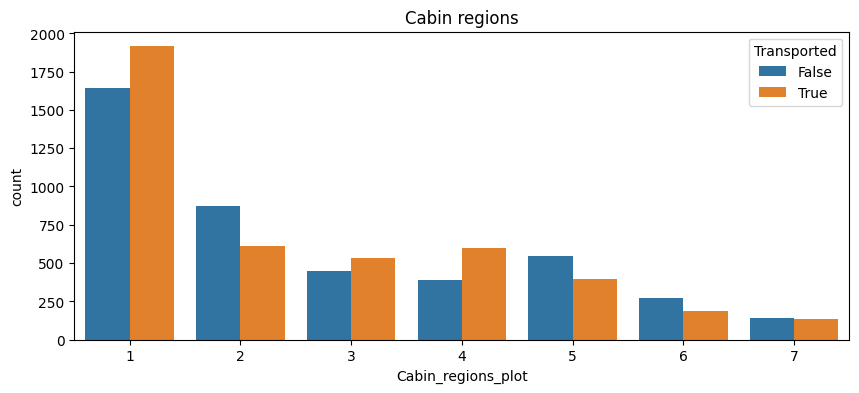

In [61]:
# New features - training set
train_data['Cabin_region1']=(train_data['Number']<300).astype(int)   # one-hot encoding
train_data['Cabin_region2']=((train_data['Number']>=300) & (train_data['Number']<600)).astype(int)
train_data['Cabin_region3']=((train_data['Number']>=600) & (train_data['Number']<900)).astype(int)
train_data['Cabin_region4']=((train_data['Number']>=900) & (train_data['Number']<1200)).astype(int)
train_data['Cabin_region5']=((train_data['Number']>=1200) & (train_data['Number']<1500)).astype(int)
train_data['Cabin_region6']=((train_data['Number']>=1500) & (train_data['Number']<1800)).astype(int)
train_data['Cabin_region7']=(train_data['Number']>=1800).astype(int)

# New features - test set
test_data['Cabin_region1']=(test_data['Number']<300).astype(int)   # one-hot encoding
test_data['Cabin_region2']=((test_data['Number']>=300) & (test_data['Number']<600)).astype(int)
test_data['Cabin_region3']=((test_data['Number']>=600) & (test_data['Number']<900)).astype(int)
test_data['Cabin_region4']=((test_data['Number']>=900) & (test_data['Number']<1200)).astype(int)
test_data['Cabin_region5']=((test_data['Number']>=1200) & (test_data['Number']<1500)).astype(int)
test_data['Cabin_region6']=((test_data['Number']>=1500) & (test_data['Number']<1800)).astype(int)
test_data['Cabin_region7']=(test_data['Number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
train_data['Cabin_regions_plot']=(train_data['Cabin_region1']+2*train_data['Cabin_region2']+3*train_data['Cabin_region3']+4*train_data['Cabin_region4']+5*train_data['Cabin_region5']+6*train_data['Cabin_region6']+7*train_data['Cabin_region7']).astype(int)
sns.countplot(data=train_data, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train_data.drop('Cabin_regions_plot', axis=1, inplace=True)


## Check out VIP

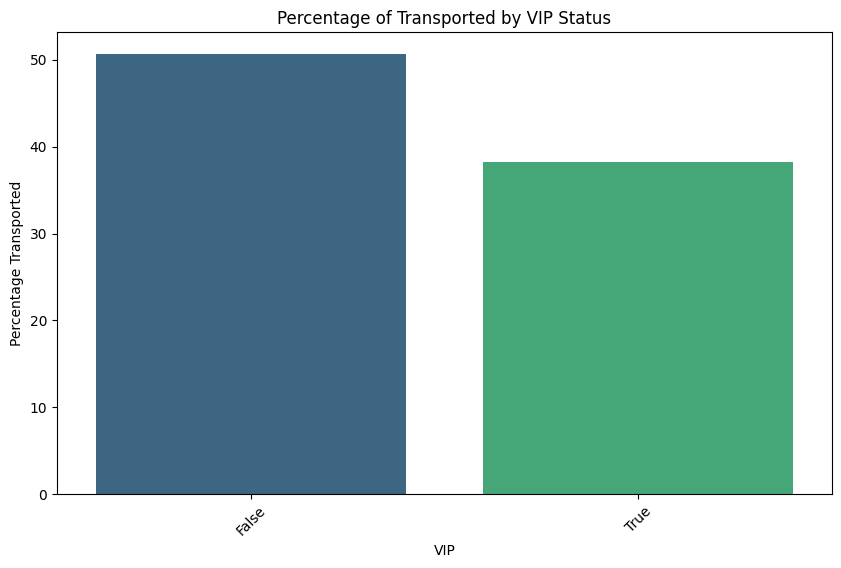

In [62]:
vip_transported_percentage = train_data.groupby('VIP_True')['Transported'].mean() * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=vip_transported_percentage.index, y=vip_transported_percentage.values, palette='viridis')
plt.xlabel('VIP')
plt.ylabel('Percentage Transported')
plt.title('Percentage of Transported by VIP Status')
plt.xticks(rotation=45)
plt.show()

## People with VIP status are less likely to be transported

In [63]:
test_data.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,AgeGroup_76-79,Deck,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,True,False,...,False,G,S,1,0,0,0,0,0,0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,True,False,...,False,F,S,1,0,0,0,0,0,0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,False,True,...,False,C,S,1,0,0,0,0,0,0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,False,True,...,False,C,S,1,0,0,0,0,0,0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,True,False,...,False,F,S,1,0,0,0,0,0,0


train_data.head(

In [64]:

train_data.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,AgeGroup_76-79,Deck,Side,Cabin_region1,Cabin_region2,Cabin_region3,Cabin_region4,Cabin_region5,Cabin_region6,Cabin_region7
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,False,False,...,False,B,P,1,0,0,0,0,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,True,True,...,False,F,S,1,0,0,0,0,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,...,False,A,S,1,0,0,0,0,0,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,...,False,A,S,1,0,0,0,0,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,True,True,...,False,F,S,1,0,0,0,0,0,0


In [65]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                4277 non-null   object 
 1   Cabin                      4277 non-null   object 
 2   Age                        4277 non-null   float64
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   HomePlanet_Earth           4277 non-null   bool   
 9   HomePlanet_Europa          4277 non-null   bool   
 10  HomePlanet_Mars            4277 non-null   bool   
 11  Destination_55 Cancri e    4277 non-null   bool   
 12  Destination_PSO J318.5-22  4277 non-null   bool   
 13  Destination_TRAPPIST-1e    4277 non-null   bool 

## Drop unneccessary columns to prevent overfitting


In [67]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)
train_data.drop('Number', axis=1, inplace=True)
test_data.drop('Number', axis=1, inplace=True)
train_data.drop('Age', axis=1, inplace=True)
test_data.drop('Age', axis=1, inplace=True)


In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 62 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   bool   
 7   HomePlanet_Earth           8693 non-null   bool   
 8   HomePlanet_Europa          8693 non-null   bool   
 9   HomePlanet_Mars            8693 non-null   bool   
 10  Destination_55 Cancri e    8693 non-null   bool   
 11  Destination_PSO J318.5-22  8693 non-null   bool   
 12  Destination_TRAPPIST-1e    8693 non-null   bool   
 13  VIP_False                  8693 non-null   bool 

In [69]:
# List all features in train_data as a comma-separated string
feature_list = ', '.join(train_data.columns)

# Print the comma-separated list of features
print(feature_list)

PassengerId, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, VIP_False, VIP_True, CryoSleep_False, CryoSleep_True, Deck_A, Deck_B, Deck_C, Deck_D, Deck_E, Deck_F, Deck_G, Deck_T, Deck_Z, Side_P, Side_S, Side_Z, TotExpenses, NoDoughSpent, GroupNum, Solo, AgeGroup_0-3, AgeGroup_4-7, AgeGroup_8-11, AgeGroup_12-15, AgeGroup_16-19, AgeGroup_20-23, AgeGroup_24-27, AgeGroup_28-31, AgeGroup_32-35, AgeGroup_36-39, AgeGroup_40-43, AgeGroup_44-47, AgeGroup_48-51, AgeGroup_52-55, AgeGroup_56-59, AgeGroup_60-63, AgeGroup_64-67, AgeGroup_68-71, AgeGroup_72-75, AgeGroup_76-79, Deck, Side, Cabin_region1, Cabin_region2, Cabin_region3, Cabin_region4, Cabin_region5, Cabin_region6, Cabin_region7


## Now for the fun!

In [73]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Transported"]

features = [
    'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
    'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
    'VIP_False', 'VIP_True', 'CryoSleep_False', 'CryoSleep_True', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
    'Deck_F', 'Deck_G', 'Deck_T', 'Deck_Z', 'Side_P', 'Side_S', 'Side_Z', 'TotExpenses', 'NoDoughSpent', 'GroupNum',
    'Solo', 'AgeGroup_0-3', 'AgeGroup_4-7', 'AgeGroup_8-11', 'AgeGroup_12-15', 'AgeGroup_16-19', 'AgeGroup_20-23',
    'AgeGroup_24-27', 'AgeGroup_28-31', 'AgeGroup_32-35', 'AgeGroup_36-39', 'AgeGroup_40-43', 'AgeGroup_44-47',
    'AgeGroup_48-51', 'AgeGroup_52-55', 'AgeGroup_56-59', 'AgeGroup_60-63', 'AgeGroup_64-67', 'AgeGroup_68-71',
    'AgeGroup_72-75', 'AgeGroup_76-79', 'Deck', 'Side', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3',
    'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7'
]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])



model = RandomForestClassifier(n_estimators=200, max_depth=32, random_state=1)
model.fit(X, y)
predictions = pd.DataFrame(model.predict(X_test))

# Convert predictions DataFrame to Series
predictions = model.predict(X_test)

# Create the output DataFrame
output = pd.DataFrame({'PassengerID': test_data['PassengerId'], 'Transported': predictions})

# Ensure 'PassengerID' is in the correct order if it's not the DataFrame index
output = output[['PassengerID', 'Transported']]

# Print the first few rows of the output DataFrame
output.head()


,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [74]:
output.to_csv('/kaggle/working/submission.csv', index=False)
output.head()

,PassengerID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
